# Nipype introduction

## Setup your analysis (import packages, set paths, etc.)

In [18]:
# import all the packages that we need
from nipype import Node
from nipype.interfaces.spm import Smooth
from nipype.interfaces import spm
from nilearn.plotting import plot_anat
spm.SPMCommand.set_mlab_paths(matlab_cmd='/opt/matlab/R2022a/bin/matlab', paths='/opt/matlab/toolboxes/spm12', use_mcr=False)

# set general paths
base_dir = '/home/johannes.wiesner/work/repos/workshop_cimh/workshop/courses/nipype/cache/'
t1_image = '/home/johannes.wiesner/work/repos/workshop_cimh/workshop/courses/nipype/data/anatomical.nii'

stty: 'standard input': Inappropriate ioctl for device


## Neuroimaging example

In [19]:
## Let's smooth a structural image
smooth = Node(Smooth(fwhm=[4,4,5],in_files = t1_image),name='smooth',base_dir=base_dir)
smooth.run()

230711-13:43:29,514 nipype.workflow INFO:
	 [Node] Setting-up "smooth" in "/home/johannes.wiesner/work/repos/workshop_cimh/workshop/courses/nipype/cache/smooth".
230711-13:43:29,515 nipype.workflow INFO:
	 [Node] Outdated cache found for "smooth".
230711-13:43:29,546 nipype.workflow INFO:
	 [Node] Executing "smooth" <nipype.interfaces.spm.preprocess.Smooth>


stty: 'standard input': Inappropriate ioctl for device


230711-13:43:47,193 nipype.workflow INFO:
	 [Node] Finished "smooth", elapsed time 11.440254s.


stty: 'standard input': Inappropriate ioctl for device


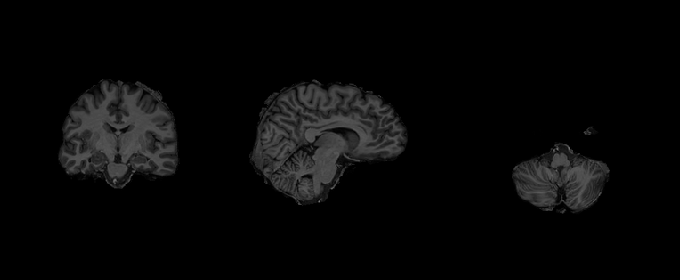

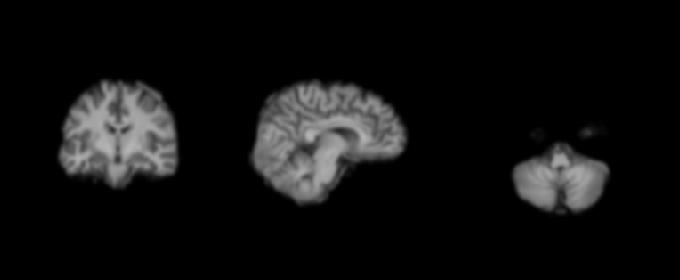

In [26]:
# Let's plot the image before and after smoothing
plot_anat(t1_image,annotate=False,draw_cross=False,cut_coords=(10,10,10))
plot_anat('/home/johannes.wiesner/work/repos/workshop_cimh/workshop/courses/nipype/cache/smooth/sanatomical.nii',annotate=False,draw_cross=False,cut_coords=(10,10,10))
